In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2]:
breast_cancer_data = load_breast_cancer()
breast_cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
#The dataset is given in the form of a dictonary. We are just displaying keys of the dictonary here
breast_cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
#This is the actual data for us to work on
breast_cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
#Names of the features we would be working on
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
#Target labels of the dataset
breast_cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
#The actual names the target labels correspond to
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
#Converting the data set to a data frame. Data and target is concatenated to a single dataframe
df = pd.DataFrame(np.c_[breast_cancer_data.data, breast_cancer_data.target], columns = [list(breast_cancer_data.feature_names) + ['target']])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [9]:
#checking if the target and data frame is rightly converted to a data frame through df.head() and df.tail()
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [10]:
#descriptive statistics of the columns in the data frame
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
#checking data types of the columns in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [12]:
#Spliting features from target labels
X = df.iloc[:,:-1]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
#creating a new data frame for target labels
Y = df.iloc[:,-1]
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: (target,), dtype: float64

In [14]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [15]:
#The data set was split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, train_size = 0.85, random_state=1)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,16.01,32.94,106.00,788.0,0.1794,0.3966,0.3381,0.15210,0.3651,0.11830
545,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.35,29.09,97.58,729.8,0.1216,0.1517,0.1049,0.07174,0.2642,0.06953
62,14.25,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,0.1949,0.07292,...,17.67,29.51,119.10,959.5,0.1640,0.6247,0.6922,0.17850,0.2844,0.11320
344,11.71,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.03250,0.2009,0.06506,...,13.06,18.16,84.16,516.4,0.1460,0.1115,0.1087,0.07864,0.2765,0.07806
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.1390,0.06005,0.2444,0.06788


In [16]:
#Checking the shape of train and test sets
print("1: ", X_train.shape, "2: ", X_test.shape, "3: ",Y_train.shape, "4: ", Y_test.shape)

1:  (483, 30) 2:  (86, 30) 3:  (483,) 4:  (86,)


In [17]:
#Using Gaussian Naive Bayes classifier
nb = GaussianNB()

In [18]:
# Training Gaussian Naive Bayes classifier
nb.fit(X_train, Y_train)

GaussianNB()

In [19]:
#Finding the training mean accuracy of the classifier
nb.score(X_train, Y_train)

0.9399585921325052

In [20]:
y_pred = nb.predict(X_test)
print(y_pred)

[0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.]


In [21]:
#Finding the mean accuracy of the classifier on the test set.
nb.score(X_test, Y_test)

0.9418604651162791

In [23]:
#Printing confusion matrix
conf_mat = confusion_matrix(Y_test, y_pred, labels = [0, 1])
conf_mat

array([[30,  4],
       [ 1, 51]], dtype=int64)

Confusion Matrix:  


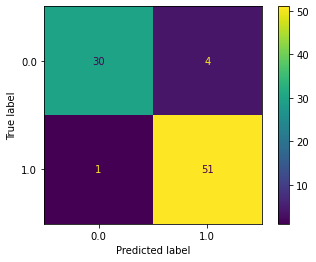

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix =conf_mat, display_labels=nb.classes_ )
print("Confusion Matrix:  ")
display.plot()
plt.show()

In [26]:
#In the next two code blocks, I'm copying the dataset to new data frames so that the original data frame is unaffected.
X1 = X.copy()
X1.head()
X1.shape

(569, 30)

In [27]:
Y1 = Y.copy()
Y1.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: (target,), dtype: float64

In [28]:
# Creating a gaussian noise with Mean = 0 and Variance = 5
mu, sigma = 0, 2.236
noise = np.random.normal(mu, sigma, [569,30])
noise_X1 = X1 + noise
noise_X1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.689411,11.996515,126.507397,1002.002228,2.178624,1.204793,-1.382807,-2.350942,2.406076,-0.773604,...,22.997705,17.276991,184.599443,2023.361901,-1.358579,0.296692,5.497915,-0.549444,2.059167,-3.350228
1,19.244960,17.086036,137.932059,1325.403700,-3.560388,2.374950,-4.419951,-3.669715,3.097263,-2.225167,...,27.863929,22.056070,158.303523,1953.910781,-2.159507,2.294490,-1.486364,-1.575872,-4.483706,-0.480014
2,22.840007,20.369511,131.595456,1203.854071,-2.932757,-1.147323,-1.050286,0.184371,-1.200052,-0.749072,...,27.063110,20.923544,152.142755,1713.346708,-6.285477,-2.352718,-0.019692,-0.726175,4.082918,-2.279080
3,10.347965,22.530552,76.196306,383.534816,1.964394,2.249890,-3.287069,1.528602,2.288083,-2.201157,...,11.187288,21.663966,99.652566,568.945859,-0.541042,7.397438,1.412228,0.709176,-0.886099,-0.022746
4,19.053046,12.652558,140.470058,1298.884656,5.432528,0.426616,-1.609299,2.383849,0.480131,0.503954,...,22.086132,15.666190,151.763429,1574.105966,1.863150,0.985545,0.919387,-4.759525,-3.409022,-0.659115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,24.879754,21.108554,140.712859,1479.167747,3.045493,1.713448,1.878291,-1.864524,0.868550,-0.792257,...,23.284593,21.847921,160.354538,2028.206171,-1.996316,-1.193046,1.613296,4.455728,-3.862605,5.385516
565,18.480813,29.306064,132.464069,1260.443337,-1.519278,2.975818,2.752114,-3.303263,-1.029005,1.087616,...,25.910794,40.907990,155.819586,1728.269380,-0.548519,1.208446,-4.611689,2.070367,-1.379103,0.995644
566,20.203224,26.838996,104.506559,856.294058,-0.417597,1.027999,-5.640094,-0.569844,-0.777334,-0.499237,...,22.357848,37.835407,125.078533,1125.824522,-0.391327,0.064059,-5.623640,-3.857831,-0.499459,0.876903
567,19.559424,25.750470,138.596779,1266.864683,0.357967,-0.920417,-0.317526,-1.988752,1.746367,0.556549,...,24.103887,39.609385,183.552593,1822.807129,3.342836,-0.632115,-0.986220,2.191699,-0.804289,-1.504858


In [29]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(noise_X1, Y1, test_size=0.15, train_size=0.85, random_state=1)
X_train1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
501,9.312459,24.872967,92.278950,598.013651,1.368439,1.544214,-3.622254,-5.390128,3.008294,1.511307,...,15.727760,27.577812,109.003599,787.254754,-0.635538,-1.803555,2.762479,-2.211806,2.496392,-1.145910
545,13.048072,25.043640,86.813412,570.085560,0.019561,0.565850,-1.278091,-1.865650,1.461852,4.872303,...,15.061363,33.299369,98.641453,732.157852,-0.850006,3.181595,0.564276,-3.039217,1.036221,1.596578
62,13.342387,22.883725,96.732530,644.290374,-2.110718,1.249965,-1.429791,2.357028,-4.788950,0.819697,...,18.211403,31.800120,121.125139,958.955985,0.721714,-0.276030,0.726206,-0.699243,-2.166588,0.780328
344,15.604472,14.338054,74.201233,419.215316,1.705343,-0.663031,-3.842237,-4.468455,2.251657,1.810463,...,14.347076,13.515162,82.918152,517.223715,2.952242,3.159022,-0.603805,0.511741,-0.394203,4.034832
457,9.254736,23.870503,87.020820,536.147931,2.386498,-0.284273,-1.027593,1.998359,2.048018,-3.325057,...,11.110523,32.630138,91.554734,631.320073,0.350971,-1.566257,0.445362,0.756523,-2.862257,1.325105


In [30]:
nb1 = GaussianNB()

In [31]:
nb1.fit(X_train1, Y_train1)

GaussianNB()

In [32]:
# Training Accuracy of classifier trained with noise added
nb1.score(X_train1, Y_train1)

0.9213250517598344

In [33]:
#Test accuracy of classifier with noise added
nb1.score(X_test1, Y_test1)

0.9069767441860465

In [34]:
y_pred1 = nb1.predict(X_test1)
y_pred1

array([1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1.])

In [35]:
#Confusion matrix of dataset added with gaussian noise with mean = 0, standard deviation = 2.236 or variance =5
conf_mat1 = confusion_matrix(Y_test1, y_pred1, labels = [0, 1])
conf_mat1

array([[27,  7],
       [ 1, 51]], dtype=int64)

Confusion Matrix:  


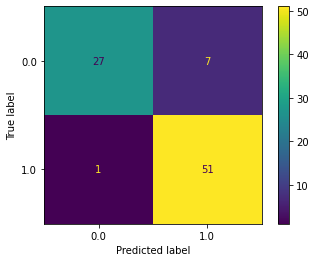

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix =conf_mat1, display_labels=nb1.classes_ )
print("Confusion Matrix:  ")
display.plot()
plt.show()

In [37]:
X2 = X.copy()
Y2 = Y.copy()

In [38]:
#Case 2: Added Gaussian noise of mean 0 and Variance 100
mu, sigma = 0, 10
noise = np.random.normal(mu, sigma, [569,30])
noise_X2 = X2 + noise
noise_X2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,9.486969,6.236669,111.375163,1012.163301,-13.977569,-7.462409,4.892082,-6.814892,-6.035427,-10.527503,...,18.598192,9.203155,184.800379,2012.339397,-3.440919,5.966799,-10.560096,2.321549,-11.517339,-5.833204
1,19.885606,20.794429,143.484120,1322.463445,-13.882034,-5.147438,-16.301162,-9.145813,17.456318,-6.961831,...,26.063251,25.733662,163.093468,1942.508589,-4.280177,2.713094,-9.911317,1.769044,0.236530,11.433292
2,16.375357,28.090960,123.103345,1201.277493,-16.319028,-2.441434,0.199309,6.950851,-0.693496,17.240204,...,22.363602,11.668688,156.649782,1715.374791,3.902157,-6.837823,8.685415,-5.083313,12.010984,3.004972
3,9.771686,22.960917,74.601768,384.076961,-0.154129,0.815588,0.511810,-6.086198,14.936202,18.225520,...,14.544232,20.031419,90.456907,562.372143,5.953435,-0.390742,6.127176,4.058218,24.566172,-5.941358
4,10.969167,4.808284,138.585572,1303.014353,4.764366,-3.675972,2.654923,0.392442,-8.805804,-8.552988,...,24.063668,17.203089,149.570122,1570.703473,-20.795271,0.781825,-10.470074,-0.208058,22.030259,-0.851213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.901369,33.761721,150.560432,1484.809887,5.125687,-8.005212,3.488518,14.178832,1.327208,-17.778152,...,32.222934,38.904981,181.488912,2027.738013,-11.415162,9.923551,11.476907,2.912768,3.381828,-3.037686
565,18.321198,13.118473,123.389440,1267.947146,7.557379,-6.443391,-0.168496,5.237844,-3.800307,2.542674,...,35.518531,29.130588,180.809380,1726.443489,-27.133259,9.580997,2.432389,6.844141,9.018269,5.626140
566,20.249027,40.126258,119.098392,872.566849,20.558457,11.191049,4.616526,-0.686532,7.959355,1.728711,...,10.732324,37.418308,138.357828,1116.079647,14.681143,-11.483716,2.474421,-5.733469,-12.340331,3.165008
567,14.579398,22.750572,141.378243,1257.576118,-4.538002,26.559882,-5.572381,0.869390,-1.874707,11.166203,...,42.461382,40.053447,193.345694,1809.204678,-7.911938,7.856804,-3.448159,26.211407,7.390709,6.738771


In [39]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(noise_X2, Y2, test_size=0.15, train_size=0.85, random_state=1)
X_train2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
501,-13.956678,18.238984,85.704637,587.678152,-5.333437,-0.255660,-21.997365,-23.396149,-2.583521,-5.808570,...,19.474241,22.263385,115.027016,787.344397,2.093080,-14.712571,5.402670,4.196046,-3.254160,-11.195038
545,20.700997,31.177733,90.718819,592.364204,13.305532,15.386314,-12.323382,4.862070,-1.577729,15.284348,...,14.218878,44.548334,83.173150,723.127160,6.236258,-6.000390,20.511182,2.901991,5.435120,-11.642371
62,31.041838,20.024998,86.811508,640.378294,-27.061322,-6.060012,11.397500,-0.597440,14.038703,-10.171522,...,14.687343,23.415945,128.559335,970.873332,-13.663301,6.981876,4.360981,10.049945,4.934499,1.068680
344,22.614916,3.347258,74.460056,437.925778,-4.402679,-18.607074,-10.530600,-2.046960,-3.308114,-10.844759,...,26.973864,23.182541,87.899618,508.637616,-8.757727,1.427310,15.891306,-17.859692,-6.634093,-5.481457
457,-5.003877,25.248016,81.577686,553.708005,11.793965,0.492825,20.187944,-18.135012,3.106492,17.163893,...,-1.711047,22.808972,92.665271,636.949066,3.646446,-7.097257,-5.286756,11.225648,10.615877,14.075540


In [40]:
nb2 = GaussianNB()

In [41]:
nb2.fit(X_train2, Y_train2)

GaussianNB()

In [42]:
nb2.score(X_train2, Y_train2)

0.9130434782608695

In [43]:
#Test Accuracy of the data set added with gaussian noise of mean 0 and variance 100.
nb2.score(X_test2, Y_test2)

0.8837209302325582

In [44]:
#Confusion matrix of dataset added with gaussian noise with mean = 0, variance =100
y_pred2 = nb2.predict(X_test2)
conf_mat2 = confusion_matrix(Y_test2, y_pred2, labels = [0, 1])
conf_mat2 

array([[25,  9],
       [ 1, 51]], dtype=int64)

Confusion Matrix:  


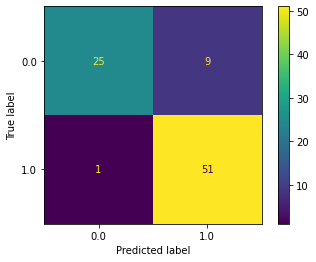

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix =conf_mat2, display_labels=nb2.classes_ )
print("Confusion Matrix:  ")
display.plot()
plt.show()

In [46]:
X3 = X.copy()
Y3 = Y.copy()

In [47]:
#Case 2: Added Gaussian noise of mean 0 and Variance 400
mu, sigma = 0, 20
noise = np.random.normal(mu, sigma, [569,30])
noise_X3 = X3 + noise
noise_X3

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,33.676560,19.992460,105.634311,994.045388,-29.543833,19.202423,24.412833,-16.254291,9.077457,-33.788623,...,27.168731,3.299785,185.301049,2015.411049,4.497571,24.669425,-7.946187,6.065134,10.321089,-0.665264
1,20.723076,56.932398,139.918108,1331.469548,7.575160,4.043501,-4.988493,-25.862154,38.495443,-26.501850,...,30.073702,13.451013,167.293182,1968.835545,-1.119363,30.043402,25.469917,27.055432,-9.972013,-7.178648
2,22.569710,11.932788,132.924522,1181.648216,-10.880405,15.199378,3.746796,16.263308,9.169149,6.844796,...,20.119830,45.903677,174.326715,1709.946591,31.346722,10.565884,-1.384764,0.788680,-0.323215,-6.111661
3,28.760188,9.596768,62.253522,357.659423,-3.295899,-26.678764,5.935591,-23.653059,-24.259556,-5.928593,...,8.146634,4.518212,117.163082,566.256607,-0.841921,30.819358,-8.095489,-13.012513,3.397473,-7.146491
4,-3.864672,38.989496,131.734237,1321.945653,-15.160928,-16.034994,6.071668,-12.320114,15.701131,25.070822,...,40.512166,28.189083,142.756218,1564.780067,-36.091355,-17.589936,-15.268297,-14.360187,-5.322644,15.460796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-2.884835,11.608813,106.188597,1488.056232,3.811045,-34.908769,-8.524564,33.312638,10.149842,11.080510,...,39.190155,50.099673,175.853917,2058.704870,7.846646,7.914662,-7.542212,-14.453960,6.412636,10.880283
565,32.670152,15.424151,98.891453,1263.481055,-1.355860,34.716017,27.844453,-49.423738,17.618540,10.187736,...,42.254502,37.236287,122.809153,1715.787221,-12.907765,-2.421657,31.984528,2.427046,-0.129277,-4.839493
566,5.254881,11.636033,78.758185,860.949167,39.926842,0.835434,18.384889,-37.070855,-3.767995,35.611314,...,24.122145,20.672136,103.668565,1122.250456,17.827677,-8.263720,18.239544,-26.041244,2.392408,-15.195326
567,33.205418,40.839122,115.757731,1259.759478,12.449647,16.287165,-2.047298,4.666980,-9.060027,19.418254,...,34.044380,43.064817,190.931902,1865.356655,-9.703065,22.656466,14.102878,-22.170935,22.620663,-8.664471


In [48]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(noise_X3, Y3, test_size=0.15, train_size=0.85, random_state=1)
X_train3.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
501,20.750719,16.002215,101.095727,602.524672,-3.214963,-26.707947,-2.724961,-26.340348,2.904224,14.861416,...,0.881499,37.043885,122.286509,790.812455,13.892620,1.925147,5.671430,-7.327324,33.907659,26.589729
545,17.857850,0.841594,76.593534,559.864372,-13.809179,-5.317159,-29.178359,-1.551768,25.518412,-10.417735,...,26.487427,57.890587,75.188421,729.033244,-4.630103,-8.643928,18.695616,15.900673,-1.014531,26.026480
62,-10.490569,15.214926,110.935440,633.413001,-2.879687,-5.603280,-4.373841,-12.222962,5.799624,-6.086222,...,28.284796,33.207107,141.350193,936.197600,20.077103,20.358913,15.193276,47.717135,5.974376,-8.576957
344,16.618315,18.981466,78.005179,421.009533,-17.229925,-10.466385,-16.924902,-4.047049,9.670188,-5.285758,...,19.794573,38.829315,57.357521,518.591083,-5.464750,22.641031,8.632560,57.516668,4.649802,6.810041
457,26.189169,30.444025,95.339247,579.258867,25.741230,4.671536,-21.955653,36.915283,4.189748,2.140310,...,24.681829,22.717353,114.457216,678.601195,-28.817817,-45.494484,-11.122422,-6.919728,10.009292,-11.376429


In [49]:
nb3 = GaussianNB()
nb3.fit(X_train3, Y_train3)
nb3.score(X_train3, Y_train3)

0.9151138716356108

In [50]:
#Test Accuracy of the data set added with gaussian noise of mean 0 and variance 400.
nb3.score(X_test3, Y_test3)

0.9069767441860465

In [51]:
#Confusion matrix of dataset added with gaussian noise with mean = 0, variance =400
y_pred3 = nb3.predict(X_test3)
conf_mat3 = confusion_matrix(Y_test3, y_pred3, labels = [0, 1])
conf_mat3

array([[26,  8],
       [ 0, 52]], dtype=int64)

Confusion Matrix:  


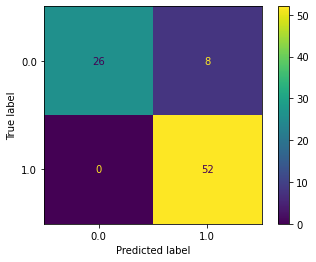

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix =conf_mat3, display_labels=nb3.classes_ )
print("Confusion Matrix:  ")
display.plot()
plt.show()

In [53]:
X4 = X.copy()
Y4 = Y.copy()

In [54]:
#Case 2: Added Gaussian noise of mean 0 and Variance 600
mu, sigma = 0, 24.495
noise = np.random.normal(mu, sigma, [569,30])
noise_X4 = X4 + noise
noise_X4

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-46.454218,-12.374090,144.823397,996.219247,-42.943383,4.308927,-19.125296,5.899835,17.216794,0.313393,...,50.911231,9.664247,209.088370,2055.954946,-12.587702,36.986059,32.398731,55.568359,32.893861,-33.361381
1,-17.872331,-8.183405,121.176918,1330.182168,38.962214,-16.150924,30.391053,-10.158317,0.490500,-23.878508,...,39.055457,-11.073462,143.778609,1960.856297,-18.325893,-8.565038,34.318667,16.953094,-0.030771,-7.833284
2,32.967333,52.760913,111.714146,1199.538508,37.895936,3.210186,32.499275,41.277997,-7.796763,-57.816387,...,29.696702,43.544102,156.313234,1722.751457,8.875901,22.641308,20.190554,-17.066715,11.856963,15.215626
3,8.284493,-29.488306,70.869442,414.223323,-26.513791,-9.762764,-0.717995,29.984383,2.159274,32.649403,...,14.312607,9.811741,108.615565,536.073350,-2.587493,-33.937794,-10.460935,2.774080,45.681216,0.298702
4,59.951924,61.271652,108.453184,1303.167088,-40.229338,-64.517010,7.591809,19.400449,-36.140643,-30.382492,...,3.489386,37.352484,149.424091,1565.668039,-19.971660,39.929812,-33.735923,-18.966426,-8.087811,10.254238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,44.339519,-13.000414,162.804534,1465.641377,-49.006014,-2.072777,-10.877696,-26.701399,-3.263317,-14.115957,...,-38.332990,-6.800342,157.571388,2019.110814,-0.561050,-15.948052,-34.749664,17.241234,45.803306,48.922169
565,36.197578,22.392088,133.119512,1258.113788,12.502934,20.155399,-14.339514,-26.840693,-75.820670,-4.998763,...,55.718118,34.208268,119.584760,1735.730716,14.853541,35.069490,-11.994471,37.080237,-4.484983,-0.834724
566,11.630803,0.065017,98.355484,848.657119,10.005925,-35.884064,2.350435,-3.189176,-11.198712,-26.709790,...,24.465162,58.148062,131.724286,1109.240735,-26.219215,-15.290175,12.724586,-0.257288,-12.346295,2.115665
567,-13.935674,9.370754,144.628008,1247.598578,-38.294884,24.736697,16.403377,4.405759,-14.970323,-28.036244,...,-7.501985,97.312564,201.318422,1833.053368,13.264958,4.414531,-5.245508,53.889954,29.173337,3.282061


In [55]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(noise_X4, Y4, test_size=0.15, train_size=0.85, random_state=1)
X_train4.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
501,16.773107,32.239807,77.923287,602.988792,23.043905,8.461498,7.915506,24.426655,-8.588072,13.050030,...,-3.992369,19.322536,88.693383,771.892725,-28.612046,-3.313406,43.408330,31.996811,-4.294931,-23.169608
545,8.022207,19.471279,116.631846,542.671185,7.851410,-24.988965,39.153828,42.583009,-19.373215,12.372007,...,17.486641,30.213727,80.534648,736.777720,-14.669668,-22.808707,-24.110545,-5.256792,27.055643,-13.752261
62,13.819026,27.949860,74.309026,640.921992,-1.100092,31.719121,-5.418390,19.999847,-2.103445,-17.754500,...,52.094456,61.345600,178.443942,980.741741,17.529909,61.107355,0.797984,18.357404,-19.155805,-43.193764
344,-1.344754,-20.437955,60.323620,428.807595,38.306433,-21.934520,-27.234588,27.951711,19.235761,-20.229883,...,-6.663693,-41.946735,71.074939,509.619578,4.376616,9.991241,32.026468,-17.763670,-7.817601,15.318748
457,-3.917568,9.302827,100.554206,544.611171,-1.839232,2.884669,-42.048805,-22.073807,-0.472404,0.432909,...,54.706706,38.812067,88.210823,586.467185,-17.516060,-8.569707,15.564486,15.274236,-20.576867,21.934959


In [56]:
nb4 = GaussianNB()
nb4.fit(X_train4, Y_train4)
nb4.score(X_train4, Y_train4)

0.917184265010352

In [57]:
#Test Accuracy of the data set added with gaussian noise of mean 0 and variance 600.
nb4.score(X_test4, Y_test4)

0.9069767441860465

In [58]:
#Confusion matrix of dataset added with gaussian noise with mean = 0, variance =600
y_pred4 = nb4.predict(X_test4)
conf_mat4 = confusion_matrix(Y_test4, y_pred4, labels = [0, 1])
conf_mat4

array([[26,  8],
       [ 0, 52]], dtype=int64)

Confusion Matrix:  


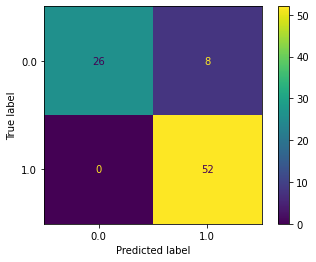

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix =conf_mat4, display_labels=nb4.classes_ )
print("Confusion Matrix:  ")
display.plot()
plt.show()

In [60]:
X5 = X.copy()
Y5 = Y.copy()

In [61]:
#Case 2: Added Gaussian noise of mean 0 and Variance 800
mu, sigma = 0, 28.284
noise = np.random.normal(mu, sigma, [569,30])
noise_X5 = X5 + noise
noise_X5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,33.304486,5.129624,52.493926,1018.298340,24.886844,-20.656071,15.849118,-17.736925,-7.515947,8.496959,...,32.720364,56.929296,212.249672,2008.426577,28.707260,-3.469283,14.137550,-46.682184,56.532070,-13.472123
1,-26.221755,25.224463,106.081579,1326.237228,64.161797,3.741096,16.572425,-12.205857,-23.771085,-45.231734,...,35.971840,43.801379,170.393463,1962.520237,15.750290,40.282718,-11.027553,13.551365,-12.566890,-82.568576
2,-0.551245,44.121343,126.457045,1153.512245,16.412650,-7.179150,-14.275603,3.464704,-17.407694,21.712180,...,54.928545,73.079738,198.167034,1746.734897,7.233911,21.124091,17.637619,-33.337052,32.497983,59.673942
3,22.793773,4.786002,61.434757,333.882586,7.836976,4.922778,-38.946952,9.602564,-11.341232,7.854732,...,-28.503490,74.959932,52.201184,602.643468,-23.958068,-40.707206,-10.938091,32.288421,5.614338,-9.735660
4,5.081272,61.487557,151.951794,1268.687404,-20.259880,44.769571,-0.576852,20.871357,38.096138,16.952587,...,-8.052751,28.948105,188.233402,1564.556340,4.963085,14.966889,34.247883,-20.555899,20.539717,41.826991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,50.170430,-12.612201,151.509199,1447.098361,7.015088,-12.224662,14.991375,30.846072,-40.596155,17.032022,...,-8.735580,20.678099,167.429641,2035.223425,-15.551470,-8.058990,-31.172675,-6.202515,-17.225980,-8.047804
565,17.555889,41.822675,179.882306,1258.504930,-13.179615,-21.448375,27.738375,-5.772958,51.821604,6.302633,...,44.592760,48.792540,221.406850,1671.798686,-44.049141,12.502259,-24.372177,-23.980896,26.917730,-58.551269
566,-11.671982,19.019039,106.812747,874.835829,4.533310,0.312195,24.633893,-20.050881,-14.256804,-23.015067,...,50.561187,36.073901,85.134767,1144.805322,-5.965380,31.287922,-36.486216,0.289078,-58.679322,17.287936
567,1.332812,20.205693,132.291749,1241.688755,26.025743,-51.850599,-19.779410,19.077939,14.241852,34.991886,...,41.689068,78.092354,164.066616,1866.328947,41.243956,8.230966,3.925501,27.192533,-76.888446,-39.497696


In [62]:
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(noise_X5, Y5, test_size=0.15, train_size=0.85, random_state=1)
X_train5.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
501,11.852884,13.813645,115.531390,601.525713,12.826344,7.269903,1.086009,6.311087,-30.322769,-7.086645,...,30.730987,50.652919,121.513352,784.599386,-35.624402,16.271478,0.405824,-27.364964,21.702936,-32.557769
545,-8.956985,26.202657,68.910949,568.338061,13.383338,-12.109449,-27.501993,11.906078,33.307644,-14.347747,...,-20.294680,-4.988340,63.985130,714.224672,14.410693,13.705736,-11.164734,-42.663774,-25.939011,-3.970485
62,2.678000,-13.466281,112.006809,609.635922,-53.344335,-49.259575,33.594530,46.177309,6.336266,6.092656,...,37.187065,-2.396894,123.262637,964.182261,1.485829,25.029932,37.501351,12.528125,-91.553507,-1.662629
344,-34.475137,-45.399639,15.965856,394.912128,3.695635,-18.811906,27.945841,-25.613459,12.739719,-21.283919,...,2.464753,1.911607,53.640606,513.966263,-29.323590,-4.913485,13.215365,35.672705,-7.393612,-15.837881
457,-0.361591,40.449170,71.563729,567.258818,-23.067645,12.744614,2.750647,17.145686,-11.529185,-26.188063,...,24.792005,1.346456,92.049140,622.372333,18.598636,-4.174599,-1.762673,42.044226,20.072299,-14.380077


In [63]:
nb5 = GaussianNB()
nb5.fit(X_train5, Y_train5)
nb5.score(X_train5, Y_train5)

0.8964803312629399

In [64]:
#Test Accuracy of the data set added with gaussian noise of mean 0 and variance 800.
nb5.score(X_test5, Y_test5)

0.8953488372093024

In [65]:
#Confusion matrix of dataset added with gaussian noise with mean = 0, variance =800
y_pred5 = nb5.predict(X_test5)
conf_mat5 = confusion_matrix(Y_test5, y_pred5, labels = [0, 1])
conf_mat5

array([[26,  8],
       [ 1, 51]], dtype=int64)

Confusion Matrix:  


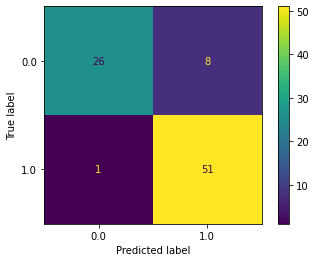

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix =conf_mat5, display_labels=nb5.classes_ )
print("Confusion Matrix:  ")
display.plot()
plt.show()